In [1]:
from axelrod import Agent, Axelrod
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr
import random as rd

In [38]:
0.6 if rd.random() < 0.5 else 0.4

0.6

Initial state of the model:

[0.13436424411240122,0.6060872148492107][0.4494910647887381,0.2502665250074666][0.762280082457942,0.008238866575225032][0.9452706955539223,0.06962607538100761][0.029040787574867943,0.16304231647028142]
-------------------------
[0.2308665415409843,0.20549166802561503][0.8375779756625729,0.42725021545574754][0.8599465287952899,0.08478428925766442][0.9364405867994596,0.20846941489714382][0.5875806061435594,0.5598787926500852]
-------------------------
[0.034525830151341586,0.18880943918897106][0.548798761388153,0.438310637802026][0.5084264882499818,0.48844342807042146][0.029574963966907064,0.07197693125689024][0.5022385584334831,0.395101514298137]
-------------------------
[0.9524673882682695,0.40073591664553365][0.9571162814602269,0.012105158405917608][0.7405034118331963,0.4589493782815643][0.05612329752074041,0.1548389276078965][0.3460779190181549,0.2729322682026879]
-------------------------
[0.027974984083842358,0.15072804583878815][0.798438940577426,0.55

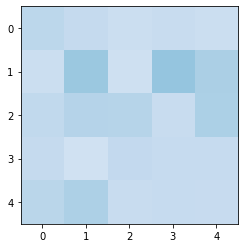

run 400


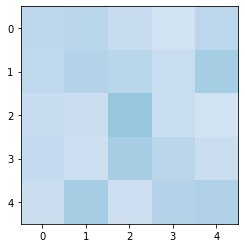

run 600


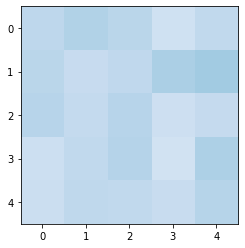

run 800


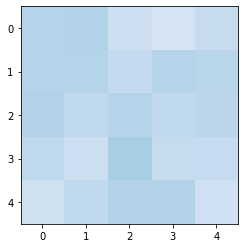

Final state of the model:
[0.13436424411240122,0.3169932605197576][0.4494910647887381,0.19955394025141804][0.762280082457942,0.26039896511358485][0.9452706955539223,0.17904289476205917][0.029040787574867943,0.2759118224146921]
-------------------------
[0.2308665415409843,0.27353354219085013][0.8375779756625729,0.25305313478925395][0.8599465287952899,0.30377410110624214][0.9364405867994596,0.26900038998343934][0.5875806061435594,0.3338228002582858]
-------------------------
[0.034525830151341586,0.3368335450219037][0.548798761388153,0.31131715960536][0.5084264882499818,0.2956733071945344][0.029574963966907064,0.1979888395395214][0.5022385584334831,0.25707457104824816]
-------------------------
[0.9524673882682695,0.2434964393900555][0.9571162814602269,0.23030996488949856][0.7405034118331963,0.2623570099470045][0.05612329752074041,0.20601011470571656][0.3460779190181549,0.2866885236846726]
-------------------------
[0.027974984083842358,0.2477870169225622][0.798438940577426,0.3308618619

In [153]:
model = Axelrod()
model.run_sim()

In [56]:
def show_histogram (model, state):
    distribution=[]
    for i in range (5**2):
        distribution.append(model.results[i][state])
    plt.hist(distribution)
    plt.title('money distribution')
    plt.xlabel('money')
    plt.ylabel('agents')
    plt.show()

In [68]:
#plt.clf()
plt.figure(figsize=(3, 2), dpi=200)
show_histogram(model,1)
show_histogram(model,-1)

In [143]:
def plot_money_evolve(model):
    for i in range (5**2):
        plt.plot (model.results[i])

In [144]:
plot_money_evolve(model)

AttributeError: 'LinearRegression' object has no attribute 'results'

In [89]:
# compute the greediness and delta for our simulation
delta = []
greediness = []
for i in range(5**2):
    delta.append(model.results[i][0]-model.results[i][-1])
    greediness.append(model.agents[i].greediness)


### compute and visualise correlations

In [134]:
plt.figure(figsize=(3, 2), dpi=200)
# create a dataframe with the two vectors
data = {'greediness': greediness, 'delta': np.abs(delta)}
df = pd.DataFrame(data)

# plot the scatter plot with regression line and 95% confidence interval
sns.regplot(x='greediness', y='delta', data=df, ci=95)

# add a title and axis labels
plt.title(r'correlation between $likelihood to play$ and $|\Delta|$')
plt.xlabel('likelihood to play')
plt.ylabel('$|\Delta|$')

plt.show()

In [139]:
# calculate the correlation and p-value
corr, p_value = pearsonr(greediness, np.abs(delta))

# print the results
print("Correlation: ", corr)
print("P-value: ", p_value)

Correlation:  0.48726075450727097
P-value:  0.01349353826946781


### implementation ideas

- delta money (veränderung) abhängig von greed 
- Varianz (SD von den 25 Geld werten zu zeit t) / Zeit 


- Einkommensverteilung 
- Graph mit Einkommensverteilung 
- correlation between 
    - reich & greedy
    - arm.. 

